<a href="https://colab.research.google.com/github/joegui2001/Story/blob/main/Fatal_Force_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 35.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [3]:
df_hh_income = pd.read_csv('sample_data/Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('sample_data/Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('sample_data/Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('sample_data/Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('sample_data/Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_hh_income.shape

(29322, 3)

In [10]:
df_hh_income.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

In [6]:
df_pct_poverty.shape

(29329, 3)

In [11]:
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [7]:
df_pct_completed_hs.shape

(29329, 3)

In [12]:
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [8]:
df_share_race_city.shape

(29268, 7)

In [13]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [9]:
df_fatalities.shape

(2535, 14)

In [14]:
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [22]:
df_fatalities.duplicated().value_counts()

False    2535
dtype: int64

In [27]:
df_share_race_city.duplicated().value_counts()

False    29268
dtype: int64

In [28]:
df_hh_income.duplicated().value_counts()

False    29322
dtype: int64

In [29]:
df_pct_poverty.duplicated().value_counts()

False    29329
dtype: int64

In [30]:
df_pct_completed_hs.duplicated().value_counts()

False    29329
dtype: int64

In [4]:
df_fatalities.fillna(0, inplace=True)
df_hh_income.fillna(0, inplace=True)
df_pct_completed_hs.fillna(0, inplace=True)
df_pct_poverty.fillna(0, inplace=True)
df_share_race_city.fillna(0, inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [5]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
poverty_rate_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index().sort_values('poverty_rate', ascending=False)
poverty_rate_by_state.head()

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.67
10,GA,23.78
32,NM,23.08
2,AR,22.96


In [20]:
plt.figure(figsize=(20, 8))
px.bar(data_frame=poverty_rate_by_state, x='Geographic Area', y='poverty_rate', orientation='v', title='Poverty Rate in each US State', labels={'Geographic Area': 'US State', 'poverty_rate': 'Poverty Rate'})

<Figure size 2000x800 with 0 Axes>

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [6]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
graduation_rate_by_state = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index().sort_values('percent_completed_hs')
graduation_rate_by_state.head()

,Geographic Area,percent_completed_hs
43,TX,75.69
25,MS,78.47
10,GA,79.01
18,LA,79.29
2,AR,79.95


Text(0, 0.5, 'Graduation %')

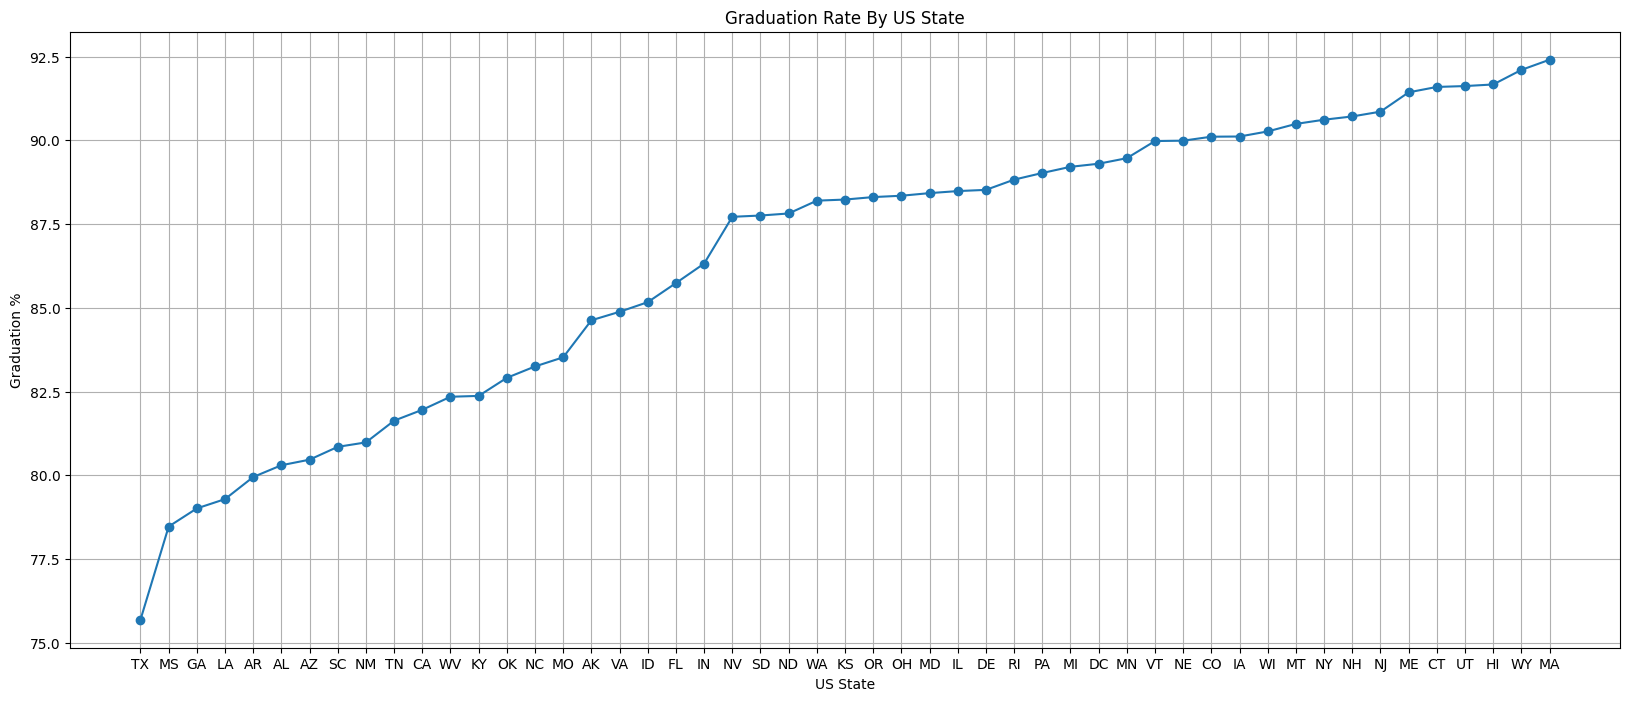

In [8]:
plt.figure(figsize=(20, 8))
plt.plot(graduation_rate_by_state['Geographic Area'], graduation_rate_by_state['percent_completed_hs'], marker='o', linestyle='-')
plt.grid(True)
plt.title('Graduation Rate By US State')
plt.xlabel('US State')
plt.ylabel('Graduation %')

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [26]:
merged_df = poverty_rate_by_state.merge(graduation_rate_by_state, on='Geographic Area')
merged_df.sort_values('percent_completed_hs', inplace=True, ascending=False)
merged_df.head(3)

,Geographic Area,poverty_rate,percent_completed_hs
48,MA,9.59,92.40
47,WY,9.89,92.10
33,HI,13.40,91.67


Text(0, 0.5, 'Graduation Rate')

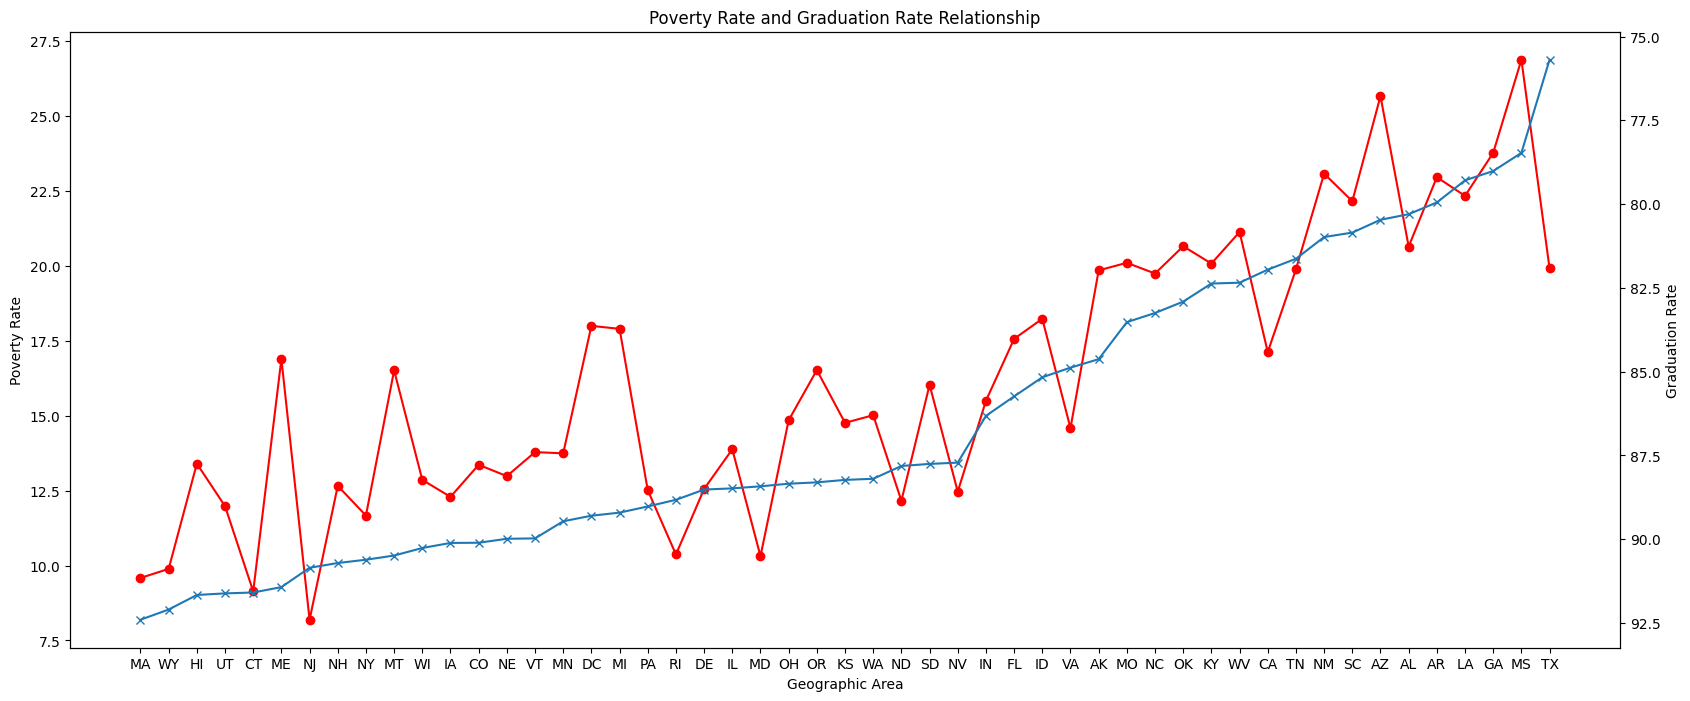

In [40]:
plt.figure(figsize=(20, 8))
plt.title('Poverty Rate and Graduation Rate Relationship')
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.invert_yaxis()
ax1.plot(merged_df['Geographic Area'], merged_df['poverty_rate'], color='red', marker='o', linestyle='-')
ax1.set_xlabel('Geographic Area')
ax1.set_ylabel('Poverty Rate')
ax2.plot(merged_df['Geographic Area'], merged_df['percent_completed_hs'], marker='x')
ax2.set_ylabel('Graduation Rate')

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

<Axes: title={'center': 'Relationship Between Poverty Rate and Graduation Rate'}, xlabel='poverty_rate', ylabel='percent_completed_hs'>

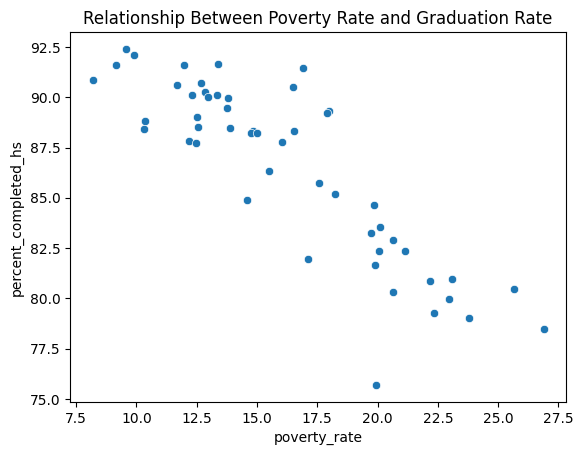

In [48]:
plt.title('Relationship Between Poverty Rate and Graduation Rate')
sns.scatterplot(data=merged_df, x='poverty_rate', y='percent_completed_hs')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

Text(20.390625000000007, 0.5, 'Graduation Rate')

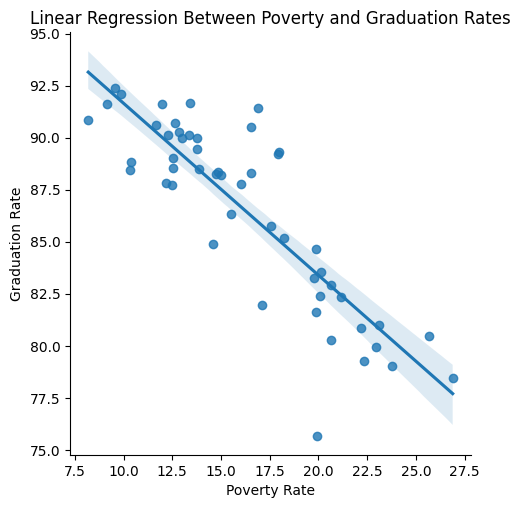

In [56]:
sns.lmplot(data=merged_df, x='poverty_rate', y='percent_completed_hs')
plt.title('Linear Regression Between Poverty and Graduation Rates')
plt.xlabel('Poverty Rate')
plt.ylabel('Graduation Rate')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [57]:
df_share_race_city.head(3)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3


In [7]:
columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'], errors='coerce')
df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'], errors='coerce')
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'], errors='coerce')
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'], errors='coerce')
df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'], errors='coerce')
race_makeup = df_share_race_city.groupby('Geographic area')[columns].mean().reset_index()
race_makeup.head(3)

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.65,0.57,45.86,1.39,2.15
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27


In [71]:
px.bar(data_frame=race_makeup, x='Geographic area', y=['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'], title='Racial Makeup of Each US State', labels={'value': 'Racial Makeup %', 'variable': 'Race'})

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [9]:
deaths_by_race = df_fatalities['race'].value_counts().reset_index()
deaths_by_race.head(3)

,index,race
0,W,1201
1,B,618
2,H,423


In [79]:
px.pie(data_frame=deaths_by_race, names='index', values='race', hole=.3, title='People Killed By Race')

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [86]:
men_v_women_deaths = df_fatalities['gender'].value_counts()
men_v_women_deaths

M    2428
F     107
Name: gender, dtype: int64

In [91]:
px.bar(data_frame=men_v_women_deaths, x=men_v_women_deaths.index, y=men_v_women_deaths.values, title='Total Number of Deaths of Men and Women', labels={'y': 'Number of Deaths', 'index': 'Gender'}, color=men_v_women_deaths.index)

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [120]:
df = df_fatalities.groupby('gender')[['manner_of_death', 'age']].value_counts().reset_index(name='number')
df

,gender,manner_of_death,age,number
0,F,shot,25.00,6
1,F,shot,50.00,5
2,F,shot,24.00,4
3,F,shot,27.00,4
4,F,shot,31.00,4
...,...,...,...,...
169,M,shot and Tasered,15.00,1
170,M,shot and Tasered,16.00,1
171,M,shot and Tasered,17.00,1
172,M,shot and Tasered,19.00,1


Text(0.5, 1.0, 'Age and Manner of Death By Gender')

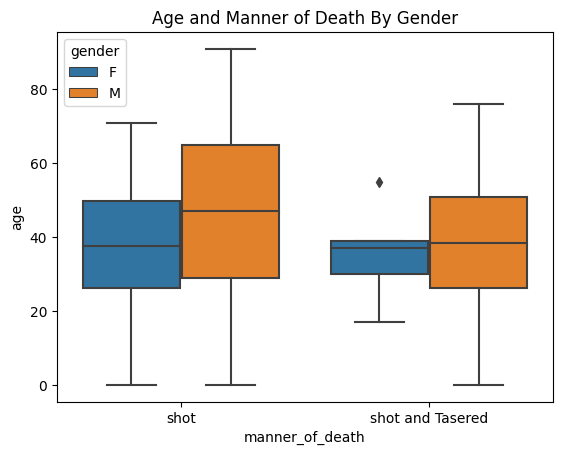

In [125]:
sns.boxplot(data=df, x='manner_of_death', y='age', hue='gender')
plt.title('Age and Manner of Death By Gender')

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [208]:
people_armed = df_fatalities[df_fatalities['armed'] != 'unarmed']
armed = people_armed.shape[0] / df_fatalities.shape[0] * 100
print(f' Armed People Killed Percentage:{armed}')

 Armed People Killed Percentage:93.25443786982248


In [206]:
armed_with_gun = df_fatalities[df_fatalities['armed'] == 'gun']
print(f'People armed with a gun: {armed_with_gun.shape[0]}')

People armed with a gun: 1398


In [207]:
unarmed = df_fatalities[df_fatalities['armed'] == 'unarmed']
print(f'People unarmed: {unarmed.shape[0]}')

People unarmed: 171


In [220]:
armed_df = df_fatalities[df_fatalities['armed'].notna()]
armed_df = armed_df['armed'].value_counts()
px.bar(data_frame=armed_df, x=armed_df.index, y=armed_df.values, log_y=True, labels={'y': 'People Killed', 'index': 'Weapon'}, color=armed_df.values, title='People Killed by Weapon')

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [35]:
under_25_deaths = df_fatalities[df_fatalities['age'] <= 25]
percentage_under_25_deaths = under_25_deaths.shape[0] / df_fatalities.shape[0] * 100
percentage_under_25_deaths

24.85207100591716

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

Text(0, 0.5, 'People Killed')

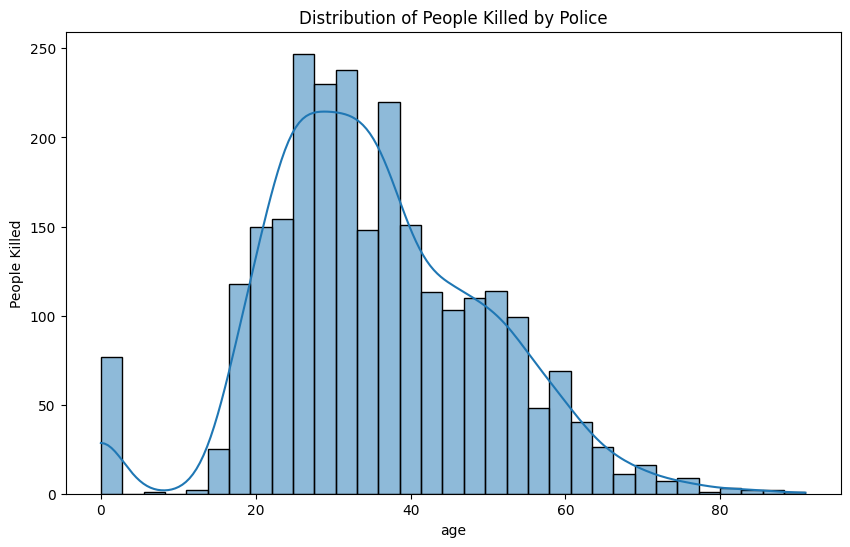

In [74]:
plt.figure(figsize=(10, 6))
fig = sns.histplot(df_fatalities, x='age', kde=True)
plt.title('Distribution of People Killed by Police')
plt.ylabel('People Killed')

Create a seperate KDE plot for each race. Is there a difference between the distributions?

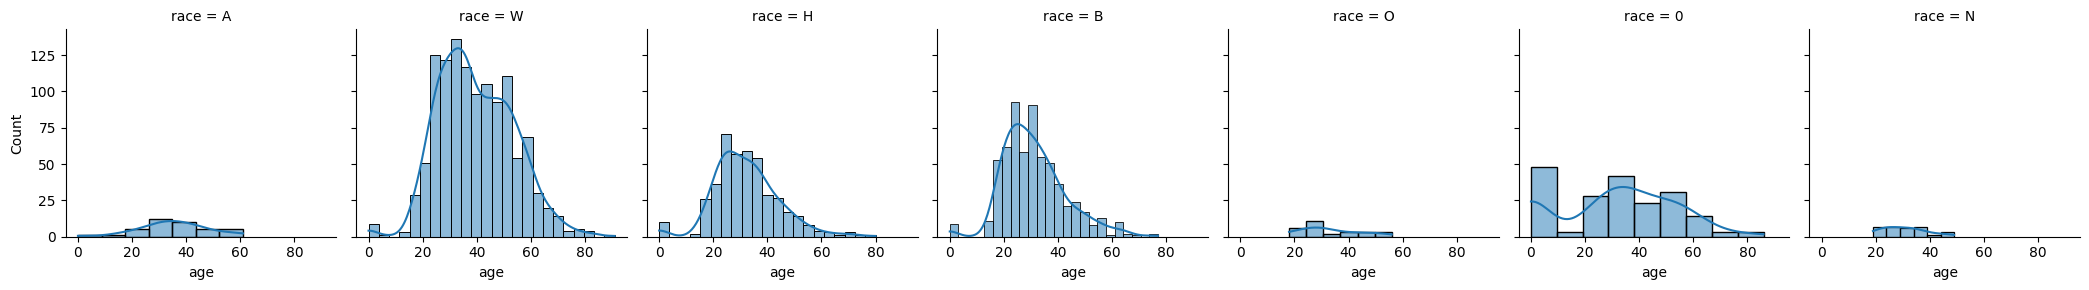

In [76]:
graph = sns.FacetGrid(df_fatalities, col='race')
graph.map(sns.histplot, 'age', kde=True)

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [113]:
people_killed_by_race = df_fatalities[df_fatalities['race'].notna()]
people_killed_by_race['race'] = people_killed_by_race['race'].replace(0, 'O')
people_killed_by_race = people_killed_by_race['race'].value_counts()

Text(0, 0.5, 'People Killed')

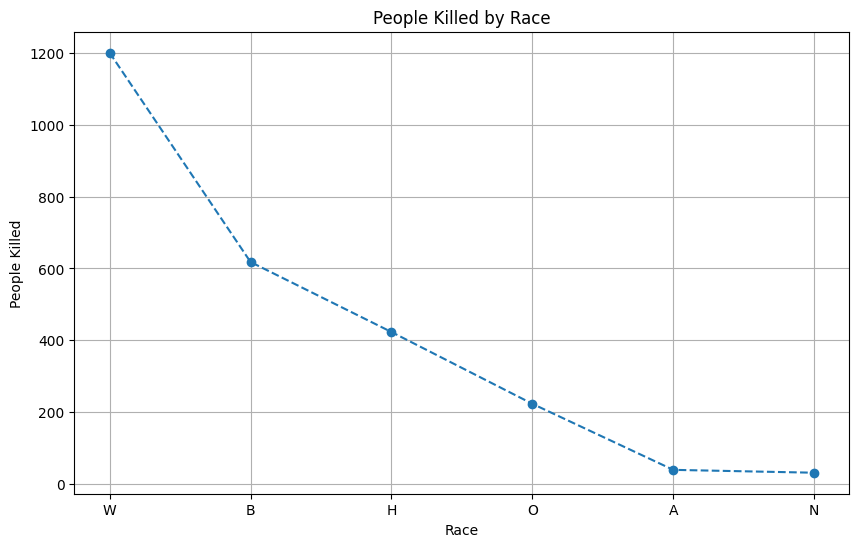

In [119]:
plt.figure(figsize=(10, 6))
plt.plot(people_killed_by_race, marker='o', linestyle='--')
plt.grid(True)
plt.title('People Killed by Race')
plt.xlabel('Race')
plt.ylabel('People Killed')

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [125]:
people_with_mental_illness = df_fatalities[df_fatalities['signs_of_mental_illness'] == True]

In [128]:
people_killed_w_mental_illness_percent = people_with_mental_illness.shape[0] / df_fatalities.shape[0] * 100
people_killed_w_mental_illness_percent

24.970414201183434

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [136]:
top_10_city = df_fatalities['city'].value_counts().head(10)

In [140]:
px.bar(data_frame=top_10_city, x=top_10_city.index, y=top_10_city.values, labels={'y': 'Killings', 'index': 'City'}, title='Top 10 Cities With Most Killings')

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [157]:
killings_by_state = df_fatalities['state'].value_counts().reset_index(name='killings')
killings_by_state.head(3)

,index,killings
0,CA,424
1,TX,225
2,FL,154


In [161]:
px.choropleth(data_frame=killings_by_state, locations='index', color='killings', locationmode='USA-states', scope='usa')

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [172]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], errors='coerce')

In [192]:
killings_over_time = df_fatalities.groupby(df_fatalities['date'].dt.year).size().reset_index(name='killings')
killings_over_time

,date,killings
0,2015,991
1,2016,963
2,2017,581


Text(0, 0.5, 'Killing Count')

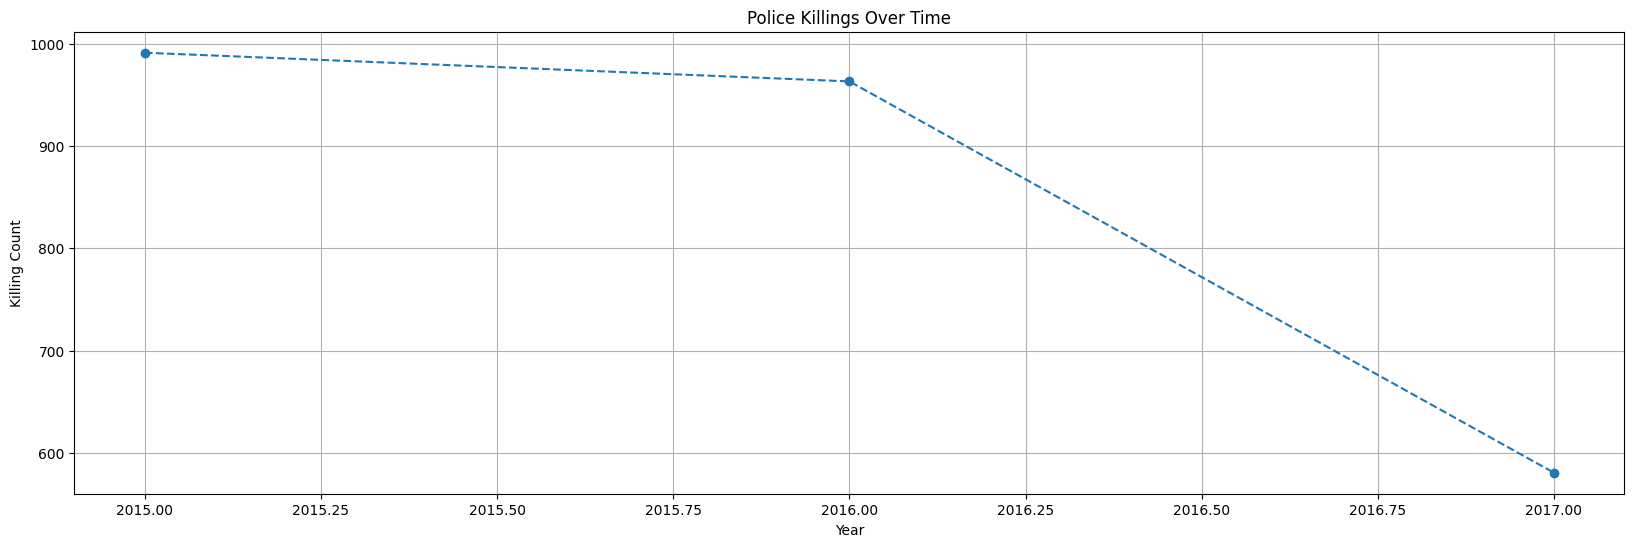

In [195]:
plt.figure(figsize=(20, 6))
plt.plot(killings_over_time.date, killings_over_time.killings, marker='o', linestyle='--')
plt.grid(True)
plt.title('Police Killings Over Time')
plt.xlabel('Year')
plt.ylabel('Killing Count')

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).